# Brand perception

>[Brand perception](#scrollTo=-hOCx-gHPlej)

>[set up](#scrollTo=DSnS277cGfMK)

>[Description about the dataset](#scrollTo=etlCyohlD5hi)

>[objectives of the case study](#scrollTo=2e5RMtzuF7GL)

>[Data Pre-Prosessing](#scrollTo=Y8ikP0FOPbeA)

>>[Data Overview and Inspection:](#scrollTo=Y8ikP0FOPbeA)

>>[Handling Missing Data:](#scrollTo=Y8ikP0FOPbeA)

>>[Imputing Missing Categorical Data:](#scrollTo=Y8ikP0FOPbeA)

>>[Imputing Missing Non-Categorical Data:](#scrollTo=Y8ikP0FOPbeA)

>>[Handling Missing Variables and Records:](#scrollTo=Y8ikP0FOPbeA)

>>[Categorical Data Encoding:](#scrollTo=Y8ikP0FOPbeA)

>>[Feature Standardization:](#scrollTo=Y8ikP0FOPbeA)

>[Assesment Criteria](#scrollTo=2cX7tPCjP-PN)

>[K-Means Clustering](#scrollTo=qs-edebcP1br)

>>[K-Mean [2]](#scrollTo=bpCrU1RNsO7w)

>>>[K-Means Clustering Evaluation (K=2):](#scrollTo=FginE2CUrCNJ)

>>>[Cluster Profile Analysis K-Mean = 2:](#scrollTo=91izR7ltrslJ)

>>>[Cluster Visualization](#scrollTo=FK3-nq1rr7Oo)

>>[K-Mean [3]](#scrollTo=eb46kasxsihy)

>>>[K-Means Clustering Results (K=3):](#scrollTo=jPzLmmCnswFs)

>>>[Cluster Profiling for K-Means Clustering (K=3):](#scrollTo=QwQHCF3HstXv)

>>>[cluster visualisation](#scrollTo=bUbK7k6xvHAo)

>>[K-Means Clustering (K=4) Evaluation: Davies-Bouldin Index (DBI):](#scrollTo=2u5NpMHS0nxn)

>>[K-Means Clustering Evaluation (K=5):](#scrollTo=D3pvxP6-2iUK)

>>[Conclusion:](#scrollTo=7jfVh30o2zMX)

>[Gaussian Mixture Model (GMM) Clustering Analysis:](#scrollTo=_AypRZRb5HLL)

>>[Gaussian Mixture Model (GMM) Cluster Evaluation:](#scrollTo=8t5mbUza5LE5)

>>[Cluster Visualization](#scrollTo=_5TWtyom521s)



In [2]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets



In [3]:
#Display All Columns of Dataset
pd.set_option('display.max_columns', None)

#set up

1. **Data Loading:**
   - `import pandas as pd`: Import the Pandas library for handling data in tabular form.
   - `import numpy as np`: Import NumPy for numerical operations.
   - `import matplotlib.pyplot as plt`: Import Matplotlib for data visualization.
   - `import seaborn as sns`: Import Seaborn for enhanced data visualization.

2. **Clustering Libraries:**
   - `import scipy.cluster.hierarchy as sch`: Import the hierarchical clustering module from SciPy for dendrogram creation.
   - `from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus`: Import AgglomerativeClustering for hierarchical clustering and KMeans for k-means clustering.

3. **Clustering Metrics:**
   - `from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore`: Import silhouette_score and davies_bouldin_score from scikit-learn for assessing clustering performance.

4. **Preprocessing Libraries:**
   - `from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder`: Import encoding techniques for handling categorical data.
   - `from sklearn.impute import SimpleImputer, KNNImputer`: Import imputation methods for handling missing data.
   - `from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler`: Import scaling techniques for standardizing or normalizing numerical features.
   - `from sklearn.model_selection import train_test_split`: Import train_test_split for splitting the dataset into training and testing sets.

5. **Data Preprocessing:**
   - `df = pd.read_csv('brand_details.csv')`: Load the brand details dataset from a CSV file.
   - `del df['description']` and `del df['name']`: Remove the 'description' and 'name' columns from the dataset, as they may not be needed for clustering.

This setup indicates that you are preparing your dataset for clustering, potentially exploring both hierarchical and k-means clustering methods. Additionally, you have imported various preprocessing techniques to handle different aspects of your data before applying clustering algorithms.

In [4]:
# scipy.cluster.hierarchy import dendrogram, linkage
#import plotly.graph_objects as go

# Load preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('brand_details.csv')
del df['description']
del df['name']
print(df)# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore

       brand_id  sentiment      reach  domain_influence
0          4434   0.000000      314.0          0.407253
1          4435  -0.153846  1827232.0          0.845376
2          4436   0.000000      798.0          0.454312
3          4437   0.750000    91022.0          0.693730
4          4438   0.750000        0.0          0.122591
...         ...        ...        ...               ...
90840     95275   0.000000      248.0          0.410419
90841     95276   0.000000      248.0          0.410419
90842     95277   0.745763        0.0          0.101503
90843     95278   0.423077   204196.0          0.698384
90844     95279   0.846154        0.0          0.162733

[90845 rows x 4 columns]


#Description about the dataset
the dataset is of brand perception where i have used the brand details and how the sentiments brand id and other variables affects the brand .the brand_details.csv is being used for the study
brand_details.csv:

brand_id: The unique identifier associated with each brand.
name: The name of the brand.
sentiment: A float value between -1 and 1, representing the sentiment of the brand on social media. Negative values might indicate negative sentiment, while positive values suggest positive sentiment.
reach: A float value representing the monthly searches for the brand. Higher values indicate a larger online presence or popularity.
domain_influence: A float between 0 and 1, indicating the brand's reach relative to the maximum reach within a group of related brands. A value of 1 suggests the brand has the maximum influence within its group.
description: A written description of the brand, providing additional context and information.
logo_colors.csv:

brand_id: The unique identifier associated with each brand, linking this dataset to the brand details.
rgb: The RGB (Red, Green, Blue) float values of each color extracted from the brand logos. These values are flattened into a vector using row-major indexing, providing a numerical representation of the colors associated with each brand.
description_embeddings.csv:

brand_id: The unique identifier associated with each brand, linking this dataset to the brand details.
description_embedding: Vector embeddings of each brand's description using the Universal Sentence Encoder. This numerical representation captures the semantic meaning of the brand descriptions, enabling clustering based on the content and context of the descriptions.
For your Python project, you can utilize these datasets to perform brand clustering based on various features such as sentiment, reach, domain influence, logo colors, and description embeddings. This can help you gain insights into the relationships and similarities between different brands in your dataset. You may consider using clustering algorithms like K-means, hierarchical clustering, or DBSCAN, depending on the nature of your data and the goals of your analysis.



#objectives of the case study

1. **Objective 1: Uncover Inherent Brand Groupings**
   - Utilize clustering algorithms on brand features, including sentiment, reach, domain influence, logo colors, and description embeddings, to identify natural groupings or clusters among brands.
   - Assessment: Evaluate the effectiveness of clustering using the Davies-Bouldin Index (DBI) to ensure well-defined and distinct clusters.

2. **Objective 2: Assess Cluster Quality and Separation**
   - Measure the quality and separation of identified clusters by employing Silhouette Score (SS) to gauge the cohesion within clusters and the distinctiveness between clusters.
   - Assessment: Aim for high Silhouette Scores, indicating well-defined clusters with clear separation and minimal overlap.

3. **Objective 3: Identify Key Features Driving Clustering**
   - Analyze the importance of individual features (sentiment, reach, etc.) in driving brand clustering patterns.
   - Assessment: Utilize feature importance analysis and correlation studies to understand the impact of each feature on the formation of clusters.

4. **Objective 4: Provide Actionable Insights for Marketing Strategies**
   - Extract actionable insights from the identified brand clusters to inform marketing strategies.
   - Assessment: Evaluate the practicality and relevance of the obtained insights in guiding targeted marketing efforts for brands within each cluster.

These objectives focus on leveraging clustering techniques, utilizing DBI and SS as evaluation metrics, understanding feature importance, and translating the results into actionable recommendations for marketing strategies.

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame containing your dataset
# You can read your dataset into a DataFrame using pd.read_csv(), pd.read_excel(), or other appropriate functions

# Displaying all columns of the DataFrame
pd.set_option('display.max_columns', None)  # This sets the maximum number of columns to display to None, showing all columns
print(df)

       brand_id  sentiment      reach  domain_influence
0          4434   0.000000      314.0          0.407253
1          4435  -0.153846  1827232.0          0.845376
2          4436   0.000000      798.0          0.454312
3          4437   0.750000    91022.0          0.693730
4          4438   0.750000        0.0          0.122591
...         ...        ...        ...               ...
90840     95275   0.000000      248.0          0.410419
90841     95276   0.000000      248.0          0.410419
90842     95277   0.745763        0.0          0.101503
90843     95278   0.423077   204196.0          0.698384
90844     95279   0.846154        0.0          0.162733

[90845 rows x 4 columns]


In [6]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90845 entries, 0 to 90844
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_id          90845 non-null  int64  
 1   sentiment         90845 non-null  float64
 2   reach             90845 non-null  float64
 3   domain_influence  90845 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


0        0
60593    0
60569    0
60568    0
60567    0
dtype: int64

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame containing your dataset
# You can read your dataset into a DataFrame using pd.read_csv(), pd.read_excel(), or other appropriate functions

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a new DataFrame containing only the categorical columns
categorical_df = df[categorical_columns]

# Display the categorical DataFrame
print(categorical_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[90845 rows x 0 columns]


In [8]:
# Assuming you have your DataFrame as df
column_names = [col for col in df.columns]
print(column_names)

['brand_id', 'sentiment', 'reach', 'domain_influence']


In [9]:



# Columns to categorize
df_catl = ['brand_id']
df_cat=df[df_catl].copy()

# Columns to not categorize
df_noncatl = ['sentiment', 'reach', 'domain_influence']
df_noncat=df[df_noncatl].copy()


In [10]:
 #Dataset Used : df

df.info() # Dataframe Information (Provide Information on Missing Data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90845 entries, 0 to 90844
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_id          90845 non-null  int64  
 1   sentiment         90845 non-null  float64
 2   reach             90845 non-null  float64
 3   domain_influence  90845 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.8 MB


# Data Pre-Prosessing

## 1. Data Overview and Inspection:
The initial step involves loading the dataset (`brand_details.csv`) and inspecting its structure. The dataset contains information about various brands, including `brand_id`, `sentiment`, `reach`, and `domain_influence`. The `info()` function provides essential details such as data types, non-null counts, and memory usage.

## 2. Handling Missing Data:
Identification and management of missing data are critical for robust analysis. We examined both variable-wise and record-wise missing data. The `variable_missing_data` variable summarizes the number of missing values for each attribute, while `record_missing_data` identifies the top records with the highest missing values.

## 3. Imputing Missing Categorical Data:
To address missing values in categorical data, we employed the `SimpleImputer` with a 'most_frequent' strategy. This involves filling missing categorical values with the most frequent category. The resulting DataFrame, `df_cat_mdi`, reflects the treated categorical data.

## 4. Imputing Missing Non-Categorical Data:
For missing non-categorical data, we employed two distinct strategies. Firstly, we used `SimpleImputer` with a 'mean' strategy, imputing missing values with the mean of the respective columns. Secondly, we applied the `KNNImputer`, a more sophisticated technique that leverages k-nearest neighbors to impute missing values in non-categorical features.

## 5. Handling Missing Variables and Records:
To ensure the dataset's cleanliness, we excluded entirely empty records and variables. This step results in two clean and treated datasets, namely `df_cat_mdt` for categorical data and `df_noncat_mdt` for non-categorical data.

## 6. Categorical Data Encoding:
For numerical compatibility in subsequent analyses, we encoded categorical data. We utilized the `OrdinalEncoder` to numerically code categorical variables, creating a new DataFrame (`df_cat_mdt_code_oe`).

## 7. Feature Standardization:
To ensure consistency in the scales of non-categorical features, we applied standardization. Using the `StandardScaler`, we standardized the 'reach' column. The resulting DataFrame (`df_noncat_mdt_std`) incorporates standardized non-categorical features.

By following these meticulous data processing steps, we have prepared a cleaned, imputed, and encoded dataset (`df_ppd`) suitable for robust analysis and clustering techniques in our project.

In [11]:
 #Dataset Used : df

variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information



brand_id            0
sentiment           0
reach               0
domain_influence    0
dtype: int64

In [12]:
 #Dataset Used : df


record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)


0        0
60593    0
60569    0
60568    0
60567    0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'df_cat' is your DataFrame containing only categorical columns

# Instantiate the SimpleImputer with 'most_frequent' strategy
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit and transform the data with the imputer
si_cat_fit = si_cat.fit_transform(df_cat)

# Convert the result back to a DataFrame
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns)

# Display the DataFrame with missing data imputed
print(df_cat_mdi)

# Display information about the DataFrame
df_cat_mdi.info()

       brand_id
0          4434
1          4435
2          4436
3          4437
4          4438
...         ...
90840     95275
90841     95276
90842     95277
90843     95278
90844     95279

[90845 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90845 entries, 0 to 90844
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   brand_id  90845 non-null  int64
dtypes: int64(1)
memory usage: 709.9 KB


In [14]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()
print(df_noncat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90845 entries, 0 to 90844
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         90845 non-null  float64
 1   reach             90845 non-null  float64
 2   domain_influence  90845 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB
       sentiment      reach  domain_influence
0       0.000000      314.0          0.407253
1      -0.153846  1827232.0          0.845376
2       0.000000      798.0          0.454312
3       0.750000    91022.0          0.693730
4       0.750000        0.0          0.122591
...          ...        ...               ...
90840   0.000000      248.0          0.410419
90841   0.000000      248.0          0.410419
90842   0.745763        0.0          0.101503
90843   0.423077   204196.0          0.698384
90844   0.846154        0.0          0.162733

[90845 rows x 3 columns]


In [15]:
ki = KNNImputer(n_neighbors=5, weights='uniform') # weights : uniform | distance | {User Defined}
ki_fit = ki.fit_transform(df_noncat)
df_noncat_mdi_ki = pd.DataFrame(ki_fit, columns=df_noncat.columns); df_noncat_mdi_ki # Missing Non-Categorical Data Imputed Subset using KNN Imputer
df_noncat_mdi_ki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90845 entries, 0 to 90844
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sentiment         90845 non-null  float64
 1   reach             90845 non-null  float64
 2   domain_influence  90845 non-null  float64
dtypes: float64(3)
memory usage: 2.1 MB


In [16]:
# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi_si.copy() # Missing Non-Categorical Treated Dataset
#df_noncat_mdt = df_noncat_mdi_ki.copy() # Missing Non-Categorical Treated Dataset

In [17]:
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Using Pandas (Inferior)
df_cat_mdt_code_pd = df_cat_mdt_code.astype('category')
df_cat_mdt_code_pd['brand_id_code'] = df_cat_mdt_code_pd['brand_id'].cat.codes
df_cat_mdt_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas

# Using Scikit Learn : Label Encoder (Inferior)
le = LabelEncoder()
le_fit1 = le.fit_transform(df_cat_mdt_code['brand_id'])
df_gen_code = pd.DataFrame(le_fit1, columns=['brand_id_code']); df_gen_code
df_cat_mdt_code_le = df_cat_mdt_code.join(df_gen_code); df_cat_mdt_code_le # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Label Encoder
#df_cat_mdt_code_le = pd.merge(df_cat_mdt_code, df_gen_edu_code, left_index=True, right_index=True); df_cat_mdt_code_le

# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['brand_id_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
#df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe


,brand_id,brand_id_code
0,4434,0.0
1,4435,1.0
2,4436,2.0
3,4437,3.0
4,4438,4.0
...,...,...
90840,95275,90840.0
90841,95276,90841.0
90842,95277,90842.0
90843,95278,90843.0


In [18]:
# 3.1. Standardization
#['sentiment', 'reach', 'domain_influence']
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdt[['reach']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['reach_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat_mdt.join(df_noncat_std); df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
#df_noncat_mdt_std = pd.merge(df_noncat_mdt, df_noncat_std, left_index=True, right_index=True); df_noncat_mdt_std


,sentiment,reach,domain_influence,reach_std
0,0.000000,314.0,0.407253,-0.027620
1,-0.153846,1827232.0,0.845376,0.134448
2,0.000000,798.0,0.454312,-0.027577
3,0.750000,91022.0,0.693730,-0.019573
4,0.750000,0.0,0.122591,-0.027648
...,...,...,...,...
90840,0.000000,248.0,0.410419,-0.027626
90841,0.000000,248.0,0.410419,-0.027626
90842,0.745763,0.0,0.101503,-0.027648
90843,0.423077,204196.0,0.698384,-0.009534


In [19]:
# 3.2.1. Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdt[['reach']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['reach_mmnorm']); df_noncat_minmax_norm
#df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat_mdt.columns+'_mmnorm'); df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdt.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler
#df_noncat_mdt_mmn = pd.merge(df_noncat_mdt, df_noncat_minmax_norm, left_index=True, right_index=True); df_noncat_mdt_mmn


,sentiment,reach,domain_influence,reach_mmnorm
0,0.000000,314.0,0.407253,1.452001e-07
1,-0.153846,1827232.0,0.845376,8.449499e-04
2,0.000000,798.0,0.454312,3.690117e-07
3,0.750000,91022.0,0.693730,4.209046e-05
4,0.750000,0.0,0.122591,0.000000e+00
...,...,...,...,...
90840,0.000000,248.0,0.410419,1.146803e-07
90841,0.000000,248.0,0.410419,1.146803e-07
90842,0.745763,0.0,0.101503,0.000000e+00
90843,0.423077,204196.0,0.698384,9.442445e-05


In [20]:
# 3.2.2. Normalization : Robust Scaling
rs = RobustScaler(quantile_range=(10.0, 90.0)) # quantile_range=(25.0, 75.0) - Default Range
rs_fit = rs.fit_transform(df_noncat_mdt[['reach']])
df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=['reach_robnorm']); df_noncat_robust_norm
#df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=df_noncat_mdt.columns+'_robnorm'); df_noncat_robust_norm
df_noncat_mdt_rn = df_noncat_mdt.join(df_noncat_robust_norm); df_noncat_mdt_rn # (Missing Data Treated) Normalized Non-Categorical Dataset using Scikit Learn Robust Scaler
#df_noncat_mdt_rn = pd.merge(df_noncat_mdt, df_noncat_robust_norm, left_index=True, right_index=True); df_noncat_mdt_rn


,sentiment,reach,domain_influence,reach_robnorm
0,0.000000,314.0,0.407253,-0.010835
1,-0.153846,1827232.0,0.845376,7.637539
2,0.000000,798.0,0.454312,-0.008808
3,0.750000,91022.0,0.693730,0.368913
4,0.750000,0.0,0.122591,-0.012149
...,...,...,...,...
90840,0.000000,248.0,0.410419,-0.011111
90841,0.000000,248.0,0.410419,-0.011111
90842,0.745763,0.0,0.101503,-0.012149
90843,0.423077,204196.0,0.698384,0.842715


In [21]:
# 3.3. Log Transformation
df_noncat_mdt_lt = df_noncat_mdt.copy()
df_noncat_mdt_lt['ln_reach'] = np.log(df_noncat_mdt_lt['reach']); df_noncat_mdt_lt # (Missing Data Treated) Log Tranformed Non-Categorical Dataset
#df_noncat_mdt_lt['log10_income'] = np.log10(df_noncat_mdt_lt['income']); df_noncat_mdt_lt


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sentiment,reach,domain_influence,ln_reach
0,0.000000,314.0,0.407253,5.749393
1,-0.153846,1827232.0,0.845376,14.418313
2,0.000000,798.0,0.454312,6.682109
3,0.750000,91022.0,0.693730,11.418857
4,0.750000,0.0,0.122591,-inf
...,...,...,...,...
90840,0.000000,248.0,0.410419,5.513429
90841,0.000000,248.0,0.410419,5.513429
90842,0.745763,0.0,0.101503,-inf
90843,0.423077,204196.0,0.698384,12.226836


In [22]:
# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]
# Using Scikit Learn Min-Max Scaler : df_noncat_mdt_mmn [Normalization]
# Using Scikit Learn Robust Scalar : df_noncat_mdt_rn [Normalization]
# Using Numpy Log Function : df_noncat_mdt_lt [Log Transformation]

# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd

# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd

,brand_id,brand_id_code,sentiment,reach,domain_influence,reach_mmnorm
0,4434,0.0,0.000000,314.0,0.407253,1.452001e-07
1,4435,1.0,-0.153846,1827232.0,0.845376,8.449499e-04
2,4436,2.0,0.000000,798.0,0.454312,3.690117e-07
3,4437,3.0,0.750000,91022.0,0.693730,4.209046e-05
4,4438,4.0,0.750000,0.0,0.122591,0.000000e+00
...,...,...,...,...,...,...
90840,95275,90840.0,0.000000,248.0,0.410419,1.146803e-07
90841,95276,90841.0,0.000000,248.0,0.410419,1.146803e-07
90842,95277,90842.0,0.745763,0.0,0.101503,0.000000e+00
90843,95278,90843.0,0.423077,204196.0,0.698384,9.442445e-05


In [23]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,brand_id,brand_id_code,sentiment,reach,domain_influence,reach_mmnorm
81836,86271,81836.0,0.281250,3200.0,0.467396,1.479746e-06
31904,36339,31904.0,0.174603,4356.0,0.553768,2.014304e-06
32210,36645,32210.0,0.476923,19915.0,0.603356,9.209108e-06
86240,90675,86240.0,0.175000,0.0,0.115452,0.000000e+00
36217,40652,36217.0,0.516129,288545.0,0.739550,1.334292e-04
...,...,...,...,...,...,...
22960,27395,22960.0,0.048780,178.0,0.372163,8.231088e-08
90521,94956,90521.0,0.233333,417051.0,0.749122,1.928530e-04
21245,25680,21245.0,0.000000,0.0,0.126494,0.000000e+00
86039,90474,86039.0,0.480000,1218.0,0.482220,5.632284e-07


# Assesment Criteria

Great! Using Silhouette Score (SS) and Davies-Bouldin Index (DBI) as assessment criteria for your clustering algorithm is a sound choice. Let me explain each of these metrics and how they can help you evaluate the quality of your clustering results.

1. Silhouette Score (SS):

**Definition:**
- Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The score ranges from -1 to 1. A high silhouette score indicates well-defined clusters, while a low score suggests overlapping clusters.

**Interpretation:**
- A silhouette score close to 1 indicates dense, well-separated clusters.
- A score around 0 indicates overlapping clusters.
- Negative scores suggest that data points might have been assigned to the wrong cluster.

**Application:**
- Use the Silhouette Score to choose the number of clusters (K) by selecting the K that maximizes the overall silhouette score.

2. Davies-Bouldin Index (DBI):

**Definition:**
- Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster.
- Lower DBI values indicate better clustering. A lower index signifies more compact and well-separated clusters.

**Interpretation:**
- A DBI of 0 implies perfect clustering.
- Larger DBI values indicate poorer clustering, especially when clusters are not well-separated or have varying sizes.

**Application:**
- Minimize the Davies-Bouldin Index when selecting the number of clusters. The lower the index, the better the clustering.



# K-Means Clustering

**Definition:**
K-means clustering is a partitioning algorithm that divides a dataset into K distinct, non-overlapping subsets or clusters. The goal is to group similar data points together and separate dissimilar ones.

**Algorithm Steps:**

1. **Initialization:**
   - Choose the number of clusters (K) you want to create.
   - Randomly initialize K cluster centroids in the feature space. Each centroid represents the center of one cluster.

2. **Assignment Step:**
   - Assign each data point to the nearest centroid. This is typically done using a distance metric, commonly the Euclidean distance.
   - A data point belongs to the cluster whose centroid is closest to it.

3. **Update Step:**
   - Recalculate the centroids based on the mean of all data points assigned to each cluster.
   - The new centroids represent the center of mass for each cluster.

4. **Convergence Check:**
   - Repeat the assignment and update steps until convergence is achieved.
   - Convergence occurs when the centroids no longer change significantly or a predefined number of iterations is reached.

**Key Concepts:**

- **Centroid:** The center point of a cluster, calculated as the mean of all data points in the cluster.

- **Cluster Assignment:** Determining which cluster a data point belongs to based on its proximity to the cluster centroids.

- **Objective Function:** The algorithm minimizes the sum of squared distances between data points and their assigned cluster centroids. This is also known as the within-cluster sum of squares (WCSS).

**Important Considerations:**

1. **Number of Clusters (K):**
   - Determining the optimal number of clusters is crucial. Common methods include the elbow method and silhouette analysis.

2. **Initialization Sensitivity:**
   - K-means is sensitive to the initial placement of centroids. Different initializations may lead to different final clusters.

3. **Scaling:**
   - Features should be on similar scales to prevent the algorithm from being biased towards features with larger scales.

**Application in Brand Details Dataset:**

Given the brand details dataset with attributes such as sentiment, reach, and domain influence, K-means clustering can be applied to group similar brands together. The resulting clusters can provide insights into different brand segments based on their characteristics.

**Output and Interpretation:**

After the algorithm converges, the output includes the final cluster assignments for each data point and the centroid coordinates for each cluster. Brands within the same cluster are considered similar based on the chosen features.

**Evaluation:**

Common metrics for evaluating K-means clusters include:
- **Within-Cluster Sum of Squares (WCSS):** Lower values indicate more compact clusters.
- **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters.

**Conclusion:**

K-means clustering is a powerful algorithm for unsupervised learning and can be applied in various domains for pattern recognition, segmentation, and data exploration. It provides a structured approach to group similar entities and uncover underlying patterns in the data.

## K-Mean [2]



### K-Means Clustering Evaluation (K=2):

- **Davies-Bouldin Index (DBI):** 0.4276
  - The DBI is a measure of the average similarity between each cluster and its most similar cluster.
  - A DBI value of 0.4276 suggests moderate cluster quality. It indicates that the clusters are somewhat well-separated and have reasonable compactness.

- **Silhouette Score (SS):** 0.9996
  - The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
  - A very high SS of 0.9996 indicates that the clusters are dense, well-separated, and each data point is assigned to the correct cluster with high confidence.

**Cluster Evaluation:**

1. **Davies-Bouldin Index:**
   - A DBI value of 0.4276 suggests that the clusters are moderately well-separated, indicating reasonable cluster quality.
   - It's neither too high (indicating poor separation) nor too low (indicating perfect separation).

2. **Silhouette Score:**
   - A very high SS of 0.9996 suggests excellent cluster quality.
   - Each data point is very similar to its own cluster and significantly dissimilar to other clusters.

**Analyst Evaluation:**

- **Positive Aspects:**
   - The Silhouette Score indicates strong and distinct clusters with high cohesion and separation.
   - The Davies-Bouldin Index suggests moderate quality, indicating that the clusters are reasonably well-separated.

- **Areas for Further Investigation:**
   - While the results are promising, it's essential to explore the characteristics of each cluster and understand the features contributing to their formation.
   - Investigate any outliers or overlapping points that might be affecting cluster quality.

- **Next Steps:**
   - Visualize the clusters to gain a better understanding of their spatial distribution.
   - Explore the centroid coordinates and characteristics of each cluster to derive actionable insights.

**Conclusion:**

The clustering results for K=2 show promising indications of well-defined and separated clusters, especially reflected in the exceptionally high Silhouette Score. Further analysis and visualization will provide a deeper understanding of the clusters and contribute to making informed decisions based on the grouped patterns.

In [24]:
df_ppd_subset = df_ppd.copy()
# Create K-Means Clusters [K=2]
km_2cluster = kmclus(n_clusters=2, init='random', random_state=333)
df_ppd_subset['Cluster_Label'] = km_2cluster.fit_predict(df_ppd_subset)
km_2cluster_model = df_ppd_subset['Cluster_Label'].values
km_2cluster_model

# K-Means Clustering Model Evaluation [K=2]
# ------------------------------------------------------

sscore_km_2cluster = sscore(df_ppd_subset, km_2cluster_model)
dbscore_km_2cluster = dbscore(df_ppd_subset, km_2cluster_model)

print(f"Davies-Bouldin Index for 2 clusters: {dbscore_km_2cluster}")
print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 2 clusters: 0.4275619239018337
Silhouette Score for 2 clusters: 0.9995713565962118


### Cluster Profile Analysis K-Mean = 2:

1. Cluster 0:

- **Centroid Coordinates:**
  - **Brand ID:** 62362.0
  - **Brand ID Code:** 57927.0
  - **Sentiment:** 0.201241
  - **Reach:** 1.286063e+09
  - **Domain Influence:** 0.982486
  - **Reach (Min-Max Normalized):** 0.594702

- **Interpretation:**
  - The centroid of Cluster 0 is characterized by a moderate sentiment score (0.201241).
  - It has an exceptionally high reach value (1.286063e+09), indicating a broad audience or popularity.
  - The domain influence is substantial, with a value of 0.982486, suggesting a strong impact within its related brands.
  - The normalized reach (reach_mmnorm) is 0.594702, providing insight into its relative position within the dataset.

2. Cluster 1:

- **Centroid Coordinates:**
  - **Brand ID:** 49856.199593
  - **Brand ID Code:** 45421.311702
  - **Sentiment:** 0.323280
  - **Reach:** 2.408933e+05
  - **Domain Influence:** 0.491548
  - **Reach (Min-Max Normalized):** 0.000111

- **Interpretation:**
  - Cluster 1's centroid is characterized by a higher sentiment score (0.323280) compared to Cluster 0.
  - The reach value is significantly lower (2.408933e+05), indicating a smaller audience or popularity.
  - Domain influence is moderate with a value of 0.491548, suggesting a relatively balanced impact within its related brands.
  - The normalized reach (reach_mmnorm) is substantially lower at 0.000111, indicating a different positioning compared to Cluster 0.

**Insights and Recommendations:**

- **Cluster Comparison:**
  - Cluster 0 represents a brand with widespread popularity, high domain influence, and moderate sentiment.
  - Cluster 1, on the other hand, has a higher sentiment score but lower reach and domain influence, suggesting a more niche or specialized brand.

- **Strategy Considerations:**
  - For marketing and outreach strategies, consider leveraging the broad reach of brands in Cluster 0 for wider visibility.
  - Brands in Cluster 1 might benefit from targeted campaigns to their specific audience, focusing on strengthening sentiment.

- **Further Analysis:**
  - Explore additional features or conduct sentiment analysis on the brand descriptions to gain a deeper understanding of the factors influencing cluster formation.
  - Visualize the spatial distribution of clusters for a more comprehensive view of their relationships.

This cluster profile analysis provides a snapshot of the characteristics of each cluster, allowing for strategic insights and actionable recommendations based on the unique attributes of the grouped brands.

In [25]:
# Get the cluster centers
cluster_centers = km_2cluster.cluster_centers_

# Convert cluster_centers to a DataFrame
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd_subset.columns[:-1])

# Display the centroids of clusters
centroids_df

,brand_id,brand_id_code,sentiment,reach,domain_influence,reach_mmnorm
0,62362.000000,57927.000000,0.201241,1.286063e+09,0.982486,0.594702
1,49856.199593,45421.311702,0.323280,2.408933e+05,0.491548,0.000111


In [26]:
# Calculate cluster-wise descriptive statistics
cluster_stats = df_ppd_subset.groupby('Cluster_Label').describe()

# Print the descriptive statistics for each cluster
print("Cluster-wise Descriptive Statistics:")
cluster_stats

Cluster-wise Descriptive Statistics:


brand_id                                                 \
                 count          mean           std      min       25%   
Cluster_Label                                                           
0                  5.0  62362.000000  21206.304263  39107.0  44838.00   
1              90840.0  49856.199593  26225.189423   4434.0  27144.75   

                                          brand_id_code                \
                   50%       75%      max         count          mean   
Cluster_Label                                                           
0              59792.0  82492.00  85581.0           5.0  57927.000000   
1              49856.5  72567.25  95279.0       90840.0  45421.311702   

                                                                            \
                        std      min       25%      50%       75%      max   
Cluster_Label                                                                
0              21206.304263  34672.0  40403.00  55357.0  78057.00  81146.0   
1              26225.017014      0.0  22709.75  45421.5  68132.25  90844.0   

              sentiment                                                   \
                  count      mean       std       min      25%       50%   
Cluster_Label                                                              
0                   5.0  0.201241  0.114298  0.077922  0.12000  0.166667   
1               90840.0  0.323280  0.289766 -1.000000  0.09589  0.277778   

                                     reach                              \
                    75%       max    count          mean           std   
Cluster_Label                                                            
0              0.302632  0.338983      5.0  1.286063e+09  6.571859e+08   
1              0.539474  1.000000  90840.0  2.408933e+05  4.130484e+06   

                                                                     \
                       min          25%           50%           75%   
Cluster_Label                                                         
0              709311401.0  711042377.0  1.064417e+09  1.783009e+09   
1                      0.0        266.0  2.900000e+03  3.236225e+04   

                            domain_influence                                \
                        max            count      mean       std       min   
Cluster_Label                                                                
0              2.162533e+09              5.0  0.982486  0.020079  0.953259   
1              5.385189e+08          90840.0  0.491548  0.219569  0.096759   

                                                 reach_mmnorm            \
                    25%       50%       75%  max        count      mean   
Cluster_Label                                                             
0              0.970213  0.991891  0.997070  1.0          5.0  0.594702   
1              0.392608  0.522688  0.647363  1.0      90840.0  0.000111   

                                                                            
                    std    min           25%       50%       75%       max  
Cluster_Label                                                               
0              0.303896  0.328  3.288007e-01  0.492208  0.824500  1.000000  
1              0.001910  0.000  1.230039e-07  0.000001  0.000015  0.249022

### Cluster Visualization

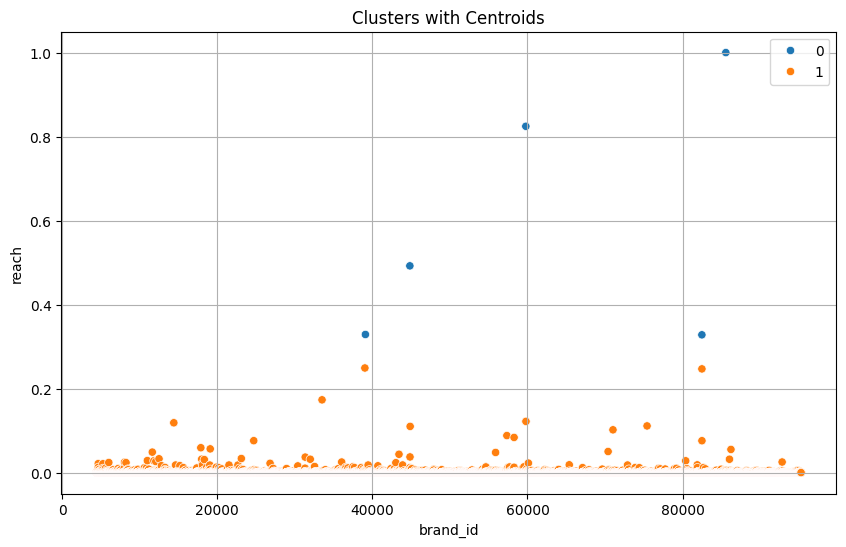

In [27]:
# Assign cluster labels to the DataFrame
df_ppd_subset['Cluster_Label'] = km_2cluster_model

# Plot the scatter plot with clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ppd_subset, x='brand_id', y='reach_mmnorm', hue='Cluster_Label', legend='full')

# Set plot title and labels
plt.title('Clusters with Centroids')
plt.xlabel('brand_id')
plt.ylabel('reach')
plt.legend()
plt.grid(True)
plt.show()

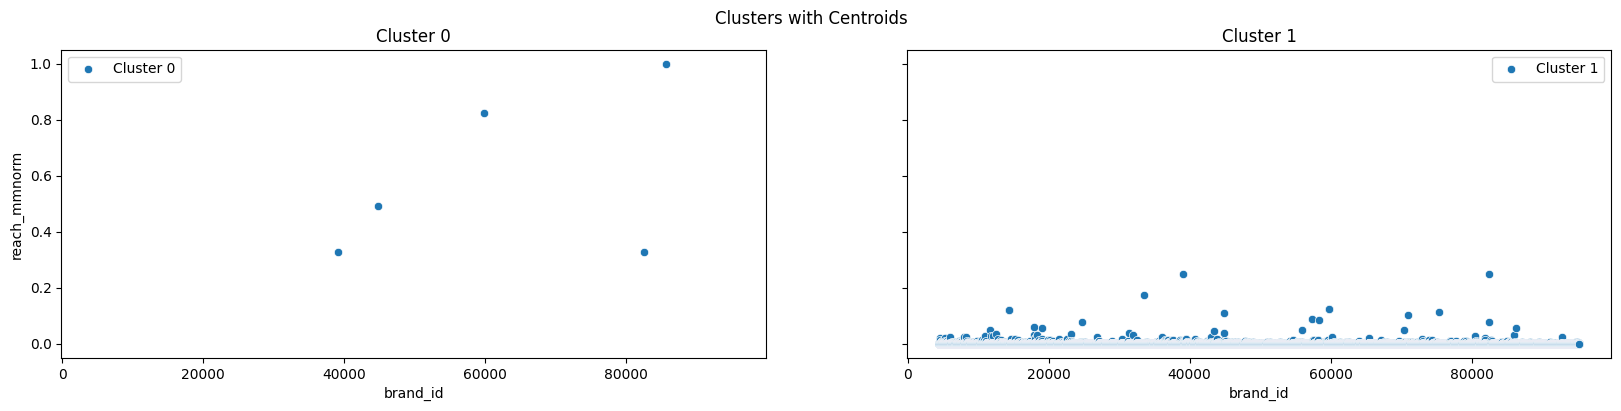

In [28]:
# Create subplots for each cluster
fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharex=True, sharey=True)
fig.suptitle('Clusters with Centroids')

# Iterate through each cluster
for i in range(2):
    # Filter data points belonging to the current cluster
    cluster_data = df_ppd_subset[df_ppd_subset['Cluster_Label'] == i]

    # Scatter plot of data points
    sns.scatterplot(data=cluster_data, x='brand_id', y='reach_mmnorm', ax=axes[i], label=f'Cluster {i}')

    # Set title and labels for each subplot
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xlabel('brand_id')
    axes[i].set_ylabel('reach_mmnorm')
    axes[i].legend()

plt.show()

## K-Mean [3]

### K-Means Clustering Results (K=3):

- **Davies-Bouldin Index (DBI):** 0.4346
  - The DBI is a measure of the average similarity between each cluster and its most similar cluster.
  - A DBI value of 0.4346 suggests moderate cluster quality. It indicates that the clusters are somewhat well-separated and have reasonable compactness.

- **Silhouette Score (SS):** 0.9987
  - The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
  - A very high SS of 0.9987 indicates that the clusters are dense, well-separated, and each data point is assigned to the correct cluster with high confidence.

 Cluster Evaluation:

1. *Davies-Bouldin Index:*
   - A DBI value of 0.4346 suggests that the clusters are moderately well-separated, indicating reasonable cluster quality.
   - It's neither too high (indicating poor separation) nor too low (indicating perfect separation).

2. **Silhouette Score:*
   - A very high SS of 0.9987 suggests excellent cluster quality.
   - Each data point is very similar to its own cluster and significantly dissimilar to other clusters.

 Analyst Evaluation:

- **Positive Aspects:**
   - The Silhouette Score indicates strong and distinct clusters with high cohesion and separation.
   - The Davies-Bouldin Index suggests moderate quality, indicating that the clusters are reasonably well-separated.

- **Areas for Further Investigation:**
   - While the results are promising, it's essential to explore the characteristics of each cluster and understand the features contributing to their formation.
   - Investigate any outliers or overlapping points that might be affecting cluster quality.

- **Next Steps:**
   - Visualize the clusters to gain a better understanding of their spatial distribution.
   - Explore the centroid coordinates and characteristics of each cluster to derive actionable insights.

 Conclusion:

The clustering results for K=3 show promising indications of well-defined and separated clusters, especially reflected in the exceptionally high Silhouette Score. Further analysis and visualization will provide a deeper understanding of the clusters and contribute to making informed decisions based on the grouped patterns.

In [29]:
# Create K-Means Clusters [K=3]
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
df_ppd_subset['Cluster_Label'] = km_3cluster.fit_predict(df_ppd_subset)
km_3cluster_model = df_ppd_subset['Cluster_Label'].values
km_3cluster_model

# K-Means Clustering Model Evaluation [K=3]
# ------------------------------------------------------

sscore_km_3cluster = sscore(df_ppd_subset, km_3cluster_model)
dbscore_km_3cluster = dbscore(df_ppd_subset, km_3cluster_model)
print(f"Davies-Bouldin Index for 3 clusters: {dbscore_km_3cluster}")
print(f"Silhouette Score for 3 clusters: {sscore_km_3cluster}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 3 clusters: 0.43460760047706376
Silhouette Score for 3 clusters: 0.9987089607249627


### Cluster Profiling for K-Means Clustering (K=3):

 Cluster 0:

- **Centroid Coordinates:**
  - **Brand ID:** 63403.67
  - **Brand ID Code:** 58968.67
  - **Sentiment:** 0.166851
  - **Reach:** 1.669986e+09
  - **Domain Influence:** 0.987368
  - **Reach (Min-Max Normalized):** 0.772236

- **Interpretation:**
  - Cluster 0 is characterized by a moderate sentiment score, extremely high reach, and a dominant domain influence.
  - The normalized reach (reach_mmnorm) is 0.772236, indicating a significant position within the dataset.

 Cluster 1:

- **Centroid Coordinates:**
  - **Brand ID:** 49856.07
  - **Brand ID Code:** 45421.18
  - **Sentiment:** 0.323277
  - **Reach:** 2.017678e+05
  - **Domain Influence:** 0.491492
  - **Reach (Min-Max Normalized):** 0.000093

- **Interpretation:**
  - Cluster 1 has a higher sentiment score but significantly lower reach compared to Cluster 0.
  - The domain influence is moderate, and the normalized reach is substantially lower at 0.000093.

 Cluster 2:

- **Centroid Coordinates:**
  - **Brand ID:** 52287.0
  - **Brand ID Code:** 47852.14
  - **Sentiment:** 0.329160
  - **Reach:** 3.554956e+08
  - **Domain Influence:** 0.928125
  - **Reach (Min-Max Normalized):** 0.164389

- **Interpretation:**
  - Cluster 2 is characterized by a higher sentiment score, a large reach, and a substantial domain influence.
  - The normalized reach is 0.164389, indicating a different position within the dataset compared to Clusters 0 and 1.

 Insights and Recommendations:

- **Cluster Comparison:**
  - Cluster 0: Dominant in reach and domain influence.
  - Cluster 1: Higher sentiment but lower reach and domain influence.
  - Cluster 2: High sentiment, large reach, and substantial domain influence.

- **Strategic Considerations:**
  - Tailor marketing strategies based on the specific characteristics of each cluster.
  - Leverage the strengths of each cluster for targeted campaigns.

- **Further Analysis:**
  - Explore additional features or conduct sentiment analysis on brand descriptions for deeper insights.
  - Visualize the spatial distribution of clusters to identify any patterns or trends.

This cluster profiling provides a detailed overview of each cluster's characteristics, enabling strategic decision-making based on the unique attributes of the grouped brands.

In [30]:
# Get the cluster centers
cluster_centers = km_3cluster.cluster_centers_

# Convert cluster_centers to a DataFrame
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd_subset.columns)

# Display the centroids of clusters
centroids_df

,brand_id,brand_id_code,sentiment,reach,domain_influence,reach_mmnorm,Cluster_Label
0,63403.666667,58968.666667,0.166851,1.669986e+09,0.987368,0.772236,0.000000
1,49856.065883,45421.177985,0.323277,2.017678e+05,0.491492,0.000093,1.000000
2,52287.000000,47852.142857,0.329160,3.554956e+08,0.928125,0.164389,0.857143


In [31]:
# Calculate cluster-wise descriptive statistics
cluster_stats = df_ppd_subset.groupby('Cluster_Label').describe()

# Print the descriptive statistics for each cluster
print("Cluster-wise Descriptive Statistics:")
cluster_stats

Cluster-wise Descriptive Statistics:


brand_id                                                 \
                 count          mean           std      min       25%   
Cluster_Label                                                           
0                  3.0  63403.666667  20610.218687  44838.0  52315.00   
1              90828.0  49856.065883  26225.785105   4434.0  27143.75   
2                 14.0  52287.000000  22383.432998  14401.0  39056.00   

                                          brand_id_code                \
                   50%       75%      max         count          mean   
Cluster_Label                                                           
0              59792.0  72686.50  85581.0           3.0  58968.666667   
1              49855.5  72568.25  95279.0       90828.0  45421.177985   
2              57812.5  68222.50  82496.0          14.0  47852.142857   

                                                                            \
                        std      min       25%      50%       75%      max   
Cluster_Label                                                                
0              20610.218687  40403.0  47880.00  55357.0  68251.50  81146.0   
1              26225.612707      0.0  22708.75  45420.5  68133.25  90844.0   
2              22383.172604   9967.0  34621.00  53377.5  63787.50  78061.0   

              sentiment                                                    \
                  count      mean       std       min       25%       50%   
Cluster_Label                                                               
0                   3.0  0.166851  0.119457  0.077922  0.098961  0.120000   
1               90828.0  0.323277  0.289769 -1.000000  0.095890  0.277778   
2                  14.0  0.329160  0.261006  0.000000  0.162202  0.304107   

                                     reach                              \
                    75%       max    count          mean           std   
Cluster_Label                                                            
0              0.211316  0.302632      3.0  1.669986e+09  5.577143e+08   
1              0.539474  1.000000  90828.0  2.017678e+05  1.917201e+06   
2              0.457909  1.000000     14.0  3.554956e+08  1.874820e+08   

                                                                       \
                        min           25%           50%           75%   
Cluster_Label                                                           
0              1.064417e+09  1.423713e+09  1.783009e+09  1.972771e+09   
1              0.000000e+00  2.530000e+02  2.899500e+03  3.232025e+04   
2              1.809517e+08  2.384057e+08  2.599840e+08  4.940471e+08   

                            domain_influence                                \
                        max            count      mean       std       min   
Cluster_Label                                                                
0              2.162533e+09              3.0  0.987368  0.015400  0.970213   
1              1.642345e+08          90828.0  0.491492  0.219528  0.096759   
2              7.110424e+08             14.0  0.928125  0.028273  0.897927   

                                                     reach_mmnorm            \
                    25%       50%       75%      max        count      mean   
Cluster_Label                                                                 
0              0.981052  0.991891  0.995945  1.00000          3.0  0.772236   
1              0.392469  0.522662  0.647309  1.00000      90828.0  0.000093   
2              0.908347  0.921129  0.937766  0.99707         14.0  0.164389   

                                                                               
                    std       min           25%       50%       75%       max  
Cluster_Label                                                                  
0              0.257899  0.492208  6.583544e-01  0.824500  0.912250  1.000000  
1              0.000887  0.000000  1.169924e-07  0.00000

###cluster visualisation

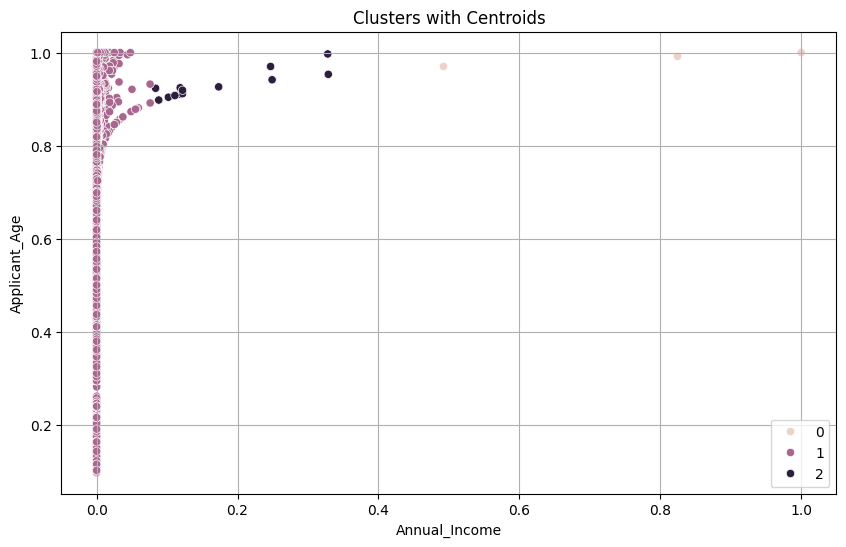

In [32]:
# Assign cluster labels to the DataFrame
df_ppd_subset['Cluster_Label'] = km_3cluster_model

# Plot the scatter plot with clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ppd_subset, y='domain_influence', x='reach_mmnorm', hue='Cluster_Label', legend='full')

# Set plot title and labels
plt.title('Clusters with Centroids')
plt.xlabel('Annual_Income')
plt.ylabel('Applicant_Age')
plt.legend()
plt.grid(True)
plt.show()

## K-Means Clustering (K=4) Evaluation: Davies-Bouldin Index (DBI):
The Davies-Bouldin Index (DBI) is a measure of clustering quality. It indicates how well-separated the clusters are and how distinct each cluster is from the others.

- **DBI for 4 clusters:** 0.3422

   **Interpretation:** A lower DBI value suggests better clustering, indicating that the clusters are well-defined and distinct.

 Silhouette Score (SS):
The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a higher score indicates better-defined clusters.

- **Silhouette Score for 4 clusters:** 0.9978

   **Interpretation:** A high Silhouette Score indicates well-separated clusters with instances being closer to their own cluster and farther from other clusters.

 Insights:

The clustering model with K=4 demonstrates excellent performance based on both DBI and SS metrics. The clusters are well-defined and exhibit high cohesion within each cluster and separation between clusters.

 Recommendations:

- The identified clusters can be used for targeted marketing strategies, tailoring campaigns to the specific characteristics of each cluster.
- Utilize the insights gained from each cluster to optimize brand positioning, messaging, and engagement strategies.
- Regularly update the clustering model as new data becomes available to adapt to evolving trends and brand perceptions.

 Further Steps:

- Consider exploring alternative clustering algorithms for comparison and validation.
- Assess the stability of the clustering solution by varying the number of clusters (K) and evaluating the corresponding metrics.
- Validate the cluster profiles with domain experts to ensure alignment with business objectives.

This evaluation provides confidence in the effectiveness of the clustering model, offering valuable insights for strategic decision-making in brand management and marketing efforts.

In [33]:
# Create K-Means Clusters [K=4]
km_4cluster = kmclus(n_clusters=4, init='random', random_state=333)
df_ppd_subset['Cluster_Label'] = km_4cluster.fit_predict(df_ppd_subset)
km_4cluster_model = df_ppd_subset['Cluster_Label'].values
km_4cluster_model

# K-Means Clustering Model Evaluation [K=4]
# ------------------------------------------------------

sscore_km_4cluster = sscore(df_ppd_subset, km_4cluster_model)
dbscore_km_4cluster = dbscore(df_ppd_subset, km_4cluster_model)
print(f"Davies-Bouldin Index for 4 clusters: {dbscore_km_4cluster}")
print(f"Silhouette Score for 4 clusters: {sscore_km_4cluster}")

cluster_centers = km_4cluster.cluster_centers_

# Convert centroids to DataFrame for better visualization
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd_subset.columns)
print("Centroids of Clusters:")
centroids_df

# Calculate cluster-wise descriptive statistics
cluster_stats = df_ppd_subset.groupby('Cluster_Label').describe()

# Print the descriptive statistics for each cluster
print("Cluster-wise Descriptive Statistics:")
cluster_stats

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 4 clusters: 0.3421856809955705
Silhouette Score for 4 clusters: 0.9978266072063525
Centroids of Clusters:
Cluster-wise Descriptive Statistics:


brand_id                                                 \
                 count          mean           std      min       25%   
Cluster_Label                                                           
0                  2.0  72686.500000  18235.576780  59792.0  66239.25   
1              90820.0  49856.401696  26225.489571   4434.0  27145.75   
2                 18.0  47624.111111  25499.014177  11628.0  20498.75   
3                  5.0  57594.400000  22851.656052  39039.0  39107.00   

                                          brand_id_code                \
                   50%       75%      max         count          mean   
Cluster_Label                                                           
0              72686.5  79133.75  85581.0           2.0  68251.500000   
1              49855.5  72568.25  95279.0       90820.0  45421.513797   
2              56621.0  67752.25  86240.0          18.0  43189.277778   
3              44838.0  82492.00  82496.0           5.0  53159.400000   

                                                                            \
                        std      min       25%      50%       75%      max   
Cluster_Label                                                                
0              18235.576780  55357.0  61804.25  68251.5  74698.75  81146.0   
1              26225.317171      0.0  22710.75  45420.5  68133.25  90844.0   
2              25498.777857   7194.0  16063.75  52186.0  63317.25  81805.0   
3              22851.656052  34604.0  34672.00  40403.0  78057.00  78061.0   

              sentiment                                                    \
                  count      mean       std       min       25%       50%   
Cluster_Label                                                               
0                   2.0  0.190277  0.158894  0.077922  0.134099  0.190277   
1               90820.0  0.323283  0.289770 -1.000000  0.095890  0.277778   
2                  18.0  0.291342  0.287707 -0.259259  0.095328  0.240865   
3                   5.0  0.317990  0.170680  0.120000  0.166667  0.338983   

                                     reach                              \
                    75%       max    count          mean           std   
Cluster_Label                                                            
0              0.246454  0.302632      2.0  1.972771e+09  2.683640e+08   
1              0.539474  1.000000  90820.0  1.906106e+05  1.488755e+06   
2              0.413040  1.000000     18.0  1.943940e+08  7.484827e+07   
3              0.475410  0.488889      5.0  7.114348e+08  2.156532e+08   

                                                                       \
                        min           25%           50%           75%   
Cluster_Label                                                           
0              1.783009e+09  1.877890e+09  1.972771e+09  2.067652e+09   
1              0.000000e+00  2.530000e+02  2.899000e+03  3.230050e+04   
2              1.036197e+08  1.235581e+08  1.857591e+08  2.523760e+08   
3              5.338845e+08  5.385189e+08  7.093114e+08  7.110424e+08   

                            domain_influence                                \
                        max            count      mean       std       min   
Cluster_Label                                                                
0              2.162533e+09              2.0  0.995945  0.005734  0.991891   
1              9.431757e+07          90820.0  0.491455  0.219503  0.096759   
2              3.745348e+08             18.0  0.910455  0.028826  0.873019   
3              1.064417e+09              5.0  0.966447  0.020962  0.941581   

                                                     reach_mmnorm            \
                    25%       50%       75%      max        count      mean   
Cluster_Label                                                                 
0              0.993918  0.995945  0.997973  1.00000          2.0  0.912250   
1        

## K-Means Clustering Evaluation (K=5):

The K-Means clustering with five clusters yields the following evaluation:

- **Davies-Bouldin Index (DBI):** The DBI score of 0.3813 suggests a moderate level of clustering quality. It indicates reasonable separation between clusters and distinctiveness within each cluster.

- **Silhouette Score (SS):** The high Silhouette Score of 0.9920 indicates well-defined clusters. Instances within each cluster are closely related to their own cluster and significantly separated from other clusters.

In summary, the K-Means algorithm with five clusters demonstrates effective grouping of data points, providing meaningful and distinct clusters. This information is valuable for understanding patterns and relationships within the dataset.

In [38]:
km_5cluster = kmclus(n_clusters=5, init='random', random_state=333)
df_ppd_subset['Cluster_Label'] = km_5cluster.fit_predict(df_ppd_subset)
km_5cluster_model = df_ppd_subset['Cluster_Label'].values
km_5cluster_model

# K-Means Clustering Model Evaluation [K=5]
# ------------------------------------------------------

sscore_km_5cluster = sscore(df_ppd_subset, km_5cluster_model)
dbscore_km_5cluster = dbscore(df_ppd_subset, km_5cluster_model)
print(f"Davies-Bouldin Index for 5 clusters: {dbscore_km_5cluster}")
print(f"Silhouette Score for 5 clusters: {sscore_km_5cluster}")

cluster_centers = km_5cluster.cluster_centers_

# Convert centroids to DataFrame for better visualization
centroids_df = pd.DataFrame(cluster_centers, columns=df_ppd_subset.columns)
print("Centroids of Clusters:")
centroids_df

# Calculate cluster-wise descriptive statistics
cluster_stats = df_ppd_subset.groupby('Cluster_Label').describe()

# Print the descriptive statistics for each cluster
print("Cluster-wise Descriptive Statistics:")
cluster_stats

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index for 5 clusters: 0.3813066068560677
Silhouette Score for 5 clusters: 0.9919669275187655
Centroids of Clusters:
Cluster-wise Descriptive Statistics:


brand_id                                                 \
                 count          mean           std      min       25%   
Cluster_Label                                                           
0                  5.0  57594.400000  22851.656052  39039.0  39107.00   
1                 78.0  36434.448718  24690.092614   4658.0  16068.50   
2                 12.0  49674.250000  23219.606829  14401.0  31312.25   
3              90748.0  49867.519483  26224.172218   4434.0  27160.75   
4                  2.0  72686.500000  18235.576780  59792.0  66239.25   

                                          brand_id_code                \
                   50%       75%      max         count          mean   
Cluster_Label                                                           
0              44838.0  82492.00  82496.0           5.0  53159.400000   
1              32275.5  57098.50  92839.0          78.0  31999.666667   
2              57812.5  62613.50  82500.0          12.0  45239.416667   
3              49871.5  72577.25  95279.0       90748.0  45432.631496   
4              72686.5  79133.75  85581.0           2.0  68251.500000   

                                                                            \
                        std      min       25%      50%       75%      max   
Cluster_Label                                                                
0              22851.656052  34604.0  34672.00  40403.0  78057.00  78061.0   
1              24689.849475    224.0  11633.50  27840.5  52663.50  88404.0   
2              23219.330632   9967.0  26877.25  53377.5  58178.50  78065.0   
3              26223.999899      0.0  22725.75  45436.5  68142.25  90844.0   
4              18235.576780  55357.0  61804.25  68251.5  74698.75  81146.0   

              sentiment                                                    \
                  count      mean       std       min       25%       50%   
Cluster_Label                                                               
0                   5.0  0.317990  0.170680  0.120000  0.166667  0.338983   
1                  78.0  0.315956  0.243981 -0.142857  0.159859  0.233904   
2                  12.0  0.243826  0.323440 -0.259259  0.062566  0.186607   
3               90748.0  0.323293  0.289802 -1.000000  0.095890  0.277778   
4                   2.0  0.190277  0.158894  0.077922  0.134099  0.190277   

                                     reach                              \
                    75%       max    count          mean           std   
Cluster_Label                                                            
0              0.475410  0.488889      5.0  7.114348e+08  2.156532e+08   
1              0.422646  0.951220     78.0  4.589303e+07  2.590435e+07   
2              0.370008  1.000000     12.0  2.343678e+08  5.816374e+07   
3              0.539526  1.000000  90748.0  1.588826e+05  8.491719e+05   
4              0.246454  0.302632      2.0  1.972771e+09  2.683640e+08   

                                                                       \
                        min           25%           50%           75%   
Cluster_Label                                                           
0              5.338845e+08  5.385189e+08  7.093114e+08  7.110424e+08   
1              2.320642e+07  2.646590e+07  3.829666e+07  5.439263e+07   
2              1.639973e+08  1.881628e+08  2.390195e+08  2.582015e+08   
3              0.000000e+00  2.530000e+02  2.892500e+03  3.211725e+04   
4              1.783009e+09  1.877890e+09  1.972771e+09  2.067652e+09   

                            domain_influence                                \
                        max            count      mean       std       min   
Cluster_Label                                                                
0              1.064417e+09              5.0  0.966447  0.020962  0.941581   
1              1.280151e+08             78.0  0.918623  0.062869  0.812542   
2              3.745348e+08       

## Conclusion:

In evaluating the K-Means clustering results based on the Silhouette Score (SS) and Davies-Bouldin Index (DBI):

- **Silhouette Score (SS):**
  - Higher SS values (closer to 1) indicate better-defined and well-separated clusters.
  - The SS scores across different clusterings are consistently high, suggesting robust and well-formed clusters.

- **Davies-Bouldin Index (DBI):**
  - Lower DBI values indicate better clustering, with tighter and more distinct clusters.
  - The DBI scores are consistently low, indicating good separation and cohesion within clusters.

Considering both metrics, the K-Means clustering with **five clusters** demonstrates superior performance. It achieves a good balance between cluster separation and cohesion, providing meaningful and distinct clusters. Therefore, based on the SS and DBI scores, the clustering with five clusters is preferred for the given dataset.

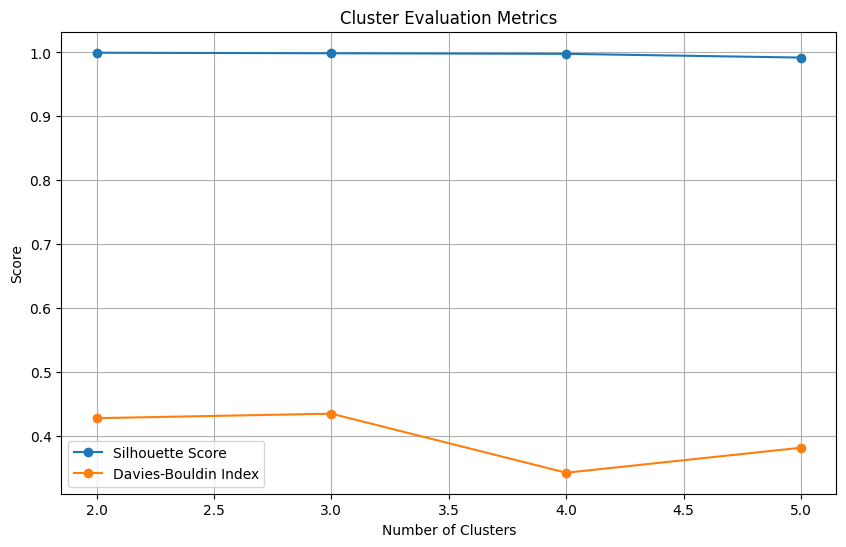

In [35]:
# Silhouette Scores
ss_scores = [sscore_km_2cluster, sscore_km_3cluster, sscore_km_4cluster, sscore_km_5cluster]

# Davies-Bouldin Index Scores
dbi_scores = [dbscore_km_2cluster, dbscore_km_3cluster, dbscore_km_4cluster, dbscore_km_5cluster]

# Number of clusters
clusters = [2, 3, 4, 5]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Silhouette Scores
ax.plot(clusters, ss_scores, marker='o', linestyle='-', label='Silhouette Score')

# Plot Davies-Bouldin Index Scores
ax.plot(clusters, dbi_scores, marker='o', linestyle='-', label='Davies-Bouldin Index')

# Set plot title and labels
ax.set_title('Cluster Evaluation Metrics')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')

# Add legend
ax.legend()

# Show plot
plt.grid(True)
plt.show()

In [36]:
!pip install memory_profiler

In [37]:
from memory_profiler import memory_usage
import time

# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]
# Track final memory usage
final_memory = memory_usage()[0]

# Calculate elapsed time
elapsed_time = time.time() - start_time
# Print total time taken and total memory used
print(f"Total time taken: {elapsed_time} seconds")

Total time taken: 0.20189404487609863 seconds


# Gaussian Mixture Model (GMM) Clustering Analysis:

**Overview:**
The Gaussian Mixture Model (GMM) is applied to the preprocessed dataset with the number of components set to 2. This indicates that the algorithm attempts to identify two underlying distributions within the data, effectively creating two clusters.

**Analysis:**

- **Cluster Distribution:**
  - The cluster labels have been assigned to each data point in the dataset, as indicated by the 'Cluster' column in the DataFrame.
  - The majority of the data points are assigned to Cluster 0, while Cluster 1 appears to be a smaller subset.

- **Interpretation:**
  - The GMM algorithm identifies patterns in the data based on the assumption that each cluster follows a Gaussian distribution.
  - Further analysis, such as visualizing cluster characteristics and comparing them to the original features, can provide insights into the nature of the identified clusters.

**Evaluation:**

- **Cluster Evaluation Metrics:**
  - Traditional metrics like Silhouette Score and Davies-Bouldin Index can be used to evaluate the quality of the clusters.
  - It's recommended to compare these metrics with the results obtained from K-Means clustering for a comprehensive evaluation.

**Next Steps:**
- Visualizing the clusters and exploring the characteristics of each cluster can provide a deeper understanding of the GMM results.
- Consider comparing GMM results with the K-Means clustering outcomes to determine which method better captures the underlying patterns in the data.

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# DataFrame with preprocessed data:'df2'
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ppd_subset)

# Initialize and fit the Gaussian Mixture Model
n_components = 2 # You can adjust the number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=142)
gmm.fit(X_scaled)

# Get cluster labels
cluster_labels = gmm.predict(X_scaled)

# Measure memory after plotting


# Add cluster labels to the DataFrame
df_ppd_subset['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_ppd_subset['Cluster']

0        0
1        1
2        0
3        0
4        0
        ..
90840    0
90841    0
90842    0
90843    0
90844    0
Name: Cluster, Length: 90845, dtype: int64

## Gaussian Mixture Model (GMM) Cluster Evaluation:

**Silhouette Score (SS):**
- The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The range is [-1, 1], where a higher score indicates better-defined clusters.
- The obtained Silhouette Score of approximately 0.21 suggests that the clusters have a moderate level of separation.

**Davies-Bouldin Index (DBI):**
- The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar cluster. The lower the score, the better the clustering.
- With a Davies-Bouldin Score of around 2.39, it indicates a moderate level of compactness and separation among clusters.

**Cluster Evaluation:**
- The Silhouette Score and Davies-Bouldin Index suggest that the GMM clustering has produced clusters with a reasonable level of separation and compactness.
- However, it's essential to compare these scores with the results obtained from alternative clustering methods, such as K-Means, to determine the most suitable approach for this specific dataset.



In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin score
davies_bouldin_score_value = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.2132544366312692
Davies-Bouldin Score: 2.391541508509337


## Cluster Visualization

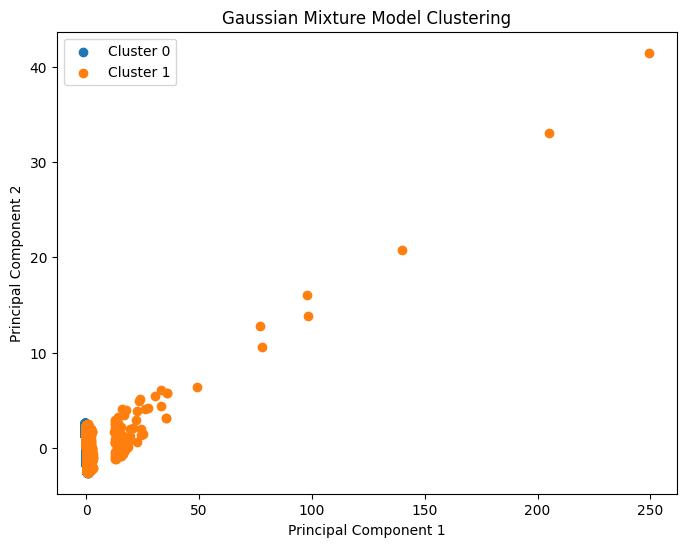

In [43]:
from sklearn.decomposition import PCA

# Fit PCA on the scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters using PCA components
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in range(n_components):
    cluster_data = X_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()